## Classification

### Discrete data are only able to have certain values, while continuous data can take on any value.

### In each of the examples, the labels come in categorical form and represent a finite number of classes.


#### Common algorithms for classification include logistic regression, k nearest neighbors, decision trees, naive bayes, support vector machines, neural networks, etc. Here we will learn how to use k nearest neighbors to classify iris species.

#### Supervised learning problems are grouped into regression and classification problems. Both problems have as a goal the construction of a mapping function from input variables (X) to an output variable (y). The difference is that the output variable is continuous in regression and categorical for classification.

### Iris dataset

In [2]:
import pandas as pd

In [3]:
iris = pd.read_csv('./data/iris.csv')

In [4]:
iris.shape

(150, 5)

In [5]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
iris = iris.rename(columns={
    'sepal.length': 'sepal_len', 
    'sepal.width': 'sepal_wd', 
    'petal.length': 'petal_len',
    'petal.width': 'petal_wd',
    'variety': 'species'
})

In [7]:
iris

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
iris['species'] = ['iris-' + iris['species'][i].lower()  for i in range(150)]


In [9]:
iris

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,iris-virginica
146,6.3,2.5,5.0,1.9,iris-virginica
147,6.5,3.0,5.2,2.0,iris-virginica
148,6.2,3.4,5.4,2.3,iris-virginica


#### Dans l'ancien dataset il y avait une colonne id qui a été supprimer

In [10]:
# iris.drop('id', axis=1, inplace=True)

#### Description du dataset pour appréhender nos données

In [11]:
iris.describe()

,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Comme la colonne des species 'especes' n'est pas numériqe elle n'est pas affichée. Et on a pas de donnée manquante alors on a des data propre
####     Les données des sepal sont bien distribué tandis que celles des pétals le sont moins

In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wd   150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wd   150 non-null    float64
 4   species    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
iris[['species']].describe()

,species
count,150
unique,3
top,iris-setosa
freq,50


In [14]:
iris[['petal_wd']].describe()

,petal_wd
count,150.000000
mean,1.199333
std,0.762238
min,0.100000
25%,0.300000
50%,1.300000
75%,1.800000
max,2.500000


#### The ranges of attributes are still of similar magnitude, thus we will skip standardization. However, standardizing attributes such that each has a mean of zero and a standard deviation of one, can be an important preprocessing step for many machine learning algorithms. This is also called feature scaling; see importance of feature scaling for more details.

### NB: Le feature scaling est importante pour les algorithmes utilisant les distance ou grandient et pour la construction des reseaux de neurones

#### Normalisation => redéfinition d'interval ; Standardisation => Moyenne et ecart type => Z-Score Normalisation => Valeur gaussienne
#### Exemple: M=4 X_min= -1 X_max=7 X' = (X - X_min) / (X_max -X_min) = 5 / 8  
#### MinMaxScaler() et StandardScaler 

In [15]:
iris.groupby('species').size()

species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64

### Class Distribution

In [16]:
iris['species'].value_counts()

iris-setosa        50
iris-versicolor    50
iris-virginica     50
Name: species, dtype: int64

#### Notre dataset est équilibré

### An imbalanced dataset is one where the classes within the data are not equally represented. An example is FRAUD

## Data Visualisation

### Univariate Plot

#### To better understand each attribute, start with univariate plots, that is, plots of each individual variable

array([[<AxesSubplot:title={'center':'sepal_len'}>,
        <AxesSubplot:title={'center':'sepal_wd'}>],
       [<AxesSubplot:title={'center':'petal_len'}>,
        <AxesSubplot:title={'center':'petal_wd'}>]], dtype=object)

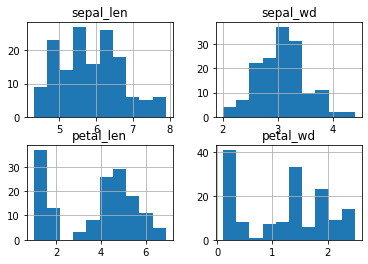

In [17]:
iris.hist()

#### This gives us a much clearer idea of the distribution of the input variable, showing that both sepal length and sepal width have a normal (Gaussian) distribution. That is, the distribution has a beautiful symmetric bell shape. However, the length of petals is not normal. Its plot shows two modes, one peak happening near 0 and the other around 5. Less patterns were observed for the petal width.

#### NB: Histograms are a type of bar chart that displays the counts or relative frequencies of values falling in different class intervals or ranges. There are more univariate summary plots including density plots and boxplots.

### Multivariate Plot

In [18]:
iris.corr()

,sepal_len,sepal_wd,petal_len,petal_wd
sepal_len,1.000000,-0.117570,0.871754,0.817941
sepal_wd,-0.117570,1.000000,-0.428440,-0.366126
petal_len,0.871754,-0.428440,1.000000,0.962865
petal_wd,0.817941,-0.366126,0.962865,1.000000


In [19]:
import matplotlib.pyplot as plt

#### Afficher le nuage de données 
#### Le c de couleur de scatter est une liste génerer pour le nombre exact de point ce qu'on peut modifier. Quand on met 'red' cela regénère une liste de  ['red', ...]

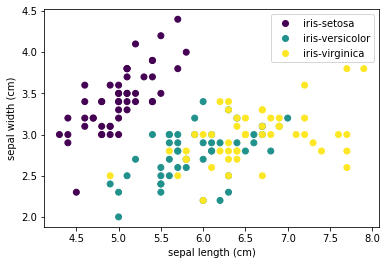

In [20]:
# build a dict mapping species to an integer code or rgb(?,?,?)
inv_name_dict = {
    'iris-setosa': 0,
    'iris-versicolor': 1,
    'iris-virginica': 2
}

# Build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]

# scatter plot
scatter = plt.scatter(
    iris['sepal_len'],
    iris['sepal_wd'],
    c = colors
)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# add legend
plt.legend(
    labels = inv_name_dict.keys(),
    handles = scatter.legend_elements()[0]
)

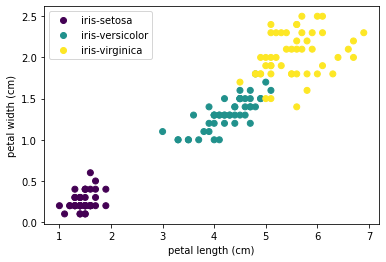

In [21]:
# scatter plot
scatter = plt.scatter(
    iris['petal_len'],
    iris['petal_wd'],
    c = colors
)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# add legend
plt.legend(
    labels = inv_name_dict.keys(),
    handles = scatter.legend_elements()[0]
)

#### Fait intéressant, la longueur et la largeur du pétale sont fortement corrélées, et ces deux caractéristiques sont très utiles pour identifier diverses espèces d'iris. Il est à noter que la frontière entre iris-versicolor et iris-virginica reste un peu floue, indiquant les difficultés pour certains classificateurs. Il convient de garder à l'esprit lors de la formation pour décider quelles fonctionnalités nous devons utiliser.

array([[<AxesSubplot:xlabel='petal_wd', ylabel='petal_wd'>]], dtype=object)

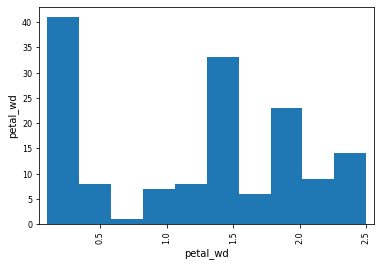

In [22]:
pd.plotting.scatter_matrix(iris[['petal_wd']])

array([[<AxesSubplot:xlabel='petal_len', ylabel='petal_len'>]],
      dtype=object)

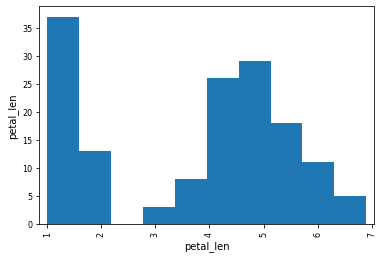

In [23]:
pd.plotting.scatter_matrix(iris[['petal_len']])

array([[<AxesSubplot:xlabel='sepal_len', ylabel='sepal_len'>,
        <AxesSubplot:xlabel='sepal_wd', ylabel='sepal_len'>,
        <AxesSubplot:xlabel='petal_len', ylabel='sepal_len'>,
        <AxesSubplot:xlabel='petal_wd', ylabel='sepal_len'>],
       [<AxesSubplot:xlabel='sepal_len', ylabel='sepal_wd'>,
        <AxesSubplot:xlabel='sepal_wd', ylabel='sepal_wd'>,
        <AxesSubplot:xlabel='petal_len', ylabel='sepal_wd'>,
        <AxesSubplot:xlabel='petal_wd', ylabel='sepal_wd'>],
       [<AxesSubplot:xlabel='sepal_len', ylabel='petal_len'>,
        <AxesSubplot:xlabel='sepal_wd', ylabel='petal_len'>,
        <AxesSubplot:xlabel='petal_len', ylabel='petal_len'>,
        <AxesSubplot:xlabel='petal_wd', ylabel='petal_len'>],
       [<AxesSubplot:xlabel='sepal_len', ylabel='petal_wd'>,
        <AxesSubplot:xlabel='sepal_wd', ylabel='petal_wd'>,
        <AxesSubplot:xlabel='petal_len', ylabel='petal_wd'>,
        <AxesSubplot:xlabel='petal_wd', ylabel='petal_wd'>]], dtype=object)

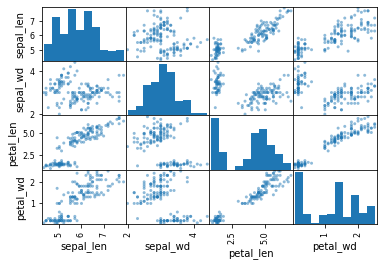

In [24]:
pd.plotting.scatter_matrix(iris)

# K nearest neighbors

#### K voisins les plus proches (knn) est un modèle d'apprentissage automatique supervisé qui prend un point de données, examine ses «k» points de données étiquetés les plus proches et attribue l'étiquette par un vote à la majorité. Ici, nous voyons que la modification de k pourrait affecter la sortie du modèle. Dans knn, k est un hyperparamètre. Un hyperparamètre dans l'apprentissage automatique est un paramètre dont la valeur est définie avant le début du processus d'apprentissage. Nous apprendrons comment régler l'hyperparamètre plus tard.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

#### K nearest neighbors can also be used for regression problems. The difference lies in prediction. Instead of a majority vote, knn for regression makes a prediction using the mean labels of the k closest data points.

In [26]:
# Our X should be petal dimension because his represent with the better way these categories
X = iris[['petal_len', 'petal_wd']]
Y = iris['species']

#### This is done to ensure that the distribution of labels remains similar in both train and test sets

### Data Preparation

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size = 0.3,
    random_state = 1,
    stratify = Y
)

In [28]:
Y_train.value_counts()

iris-setosa        35
iris-virginica     35
iris-versicolor    35
Name: species, dtype: int64

In [29]:
Y_test.value_counts()

iris-virginica     15
iris-setosa        15
iris-versicolor    15
Name: species, dtype: int64

In [30]:
50 * 0.7
# test => 15
# train => 35
# stratify equilibre la repartition

35.0

#### NB: In classifications, stratified sampling is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set

### Modeling

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

### Label Prediction

In [33]:
Y_pred = knn.predict(X_test)

In [34]:
Y_pred[:5]

array(['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor',
       'iris-versicolor'], dtype=object)

### Probability Prediction

#### De tous les algorithmes de classification implémentés dans scikit learn, il existe une méthode supplémentaire 'predict_prob'. Au lieu de diviser l'étiquette, il affiche la probabilité de la cible sous forme de tableau. Voyons quelles sont les probabilités prédites pour les 11e et 12e fleurs :

In [35]:
Y_pred_prob = knn.predict_proba(X_test)

In [36]:
Y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

In [37]:
Y_pred[10:12]

array(['iris-setosa', 'iris-virginica'], dtype=object)

#### NB: In classification tasks, soft prediction returns the predicted probabilities of data points belonging to each of the classes while hard prediction outputs the labels only.

In [38]:
Y_test

148     iris-virginica
5          iris-setosa
6          iris-setosa
106     iris-virginica
75     iris-versicolor
71     iris-versicolor
108     iris-virginica
68     iris-versicolor
111     iris-virginica
16         iris-setosa
15         iris-setosa
127     iris-virginica
8          iris-setosa
57     iris-versicolor
47         iris-setosa
76     iris-versicolor
141     iris-virginica
66     iris-versicolor
74     iris-versicolor
147     iris-virginica
102     iris-virginica
12         iris-setosa
65     iris-versicolor
121     iris-virginica
94     iris-versicolor
56     iris-versicolor
98     iris-versicolor
144     iris-virginica
43         iris-setosa
113     iris-virginica
11         iris-setosa
0          iris-setosa
62     iris-versicolor
53     iris-versicolor
107     iris-virginica
112     iris-virginica
37         iris-setosa
25         iris-setosa
1          iris-setosa
50     iris-versicolor
120     iris-virginica
149     iris-virginica
54     iris-versicolor
7          

In [39]:
Y_test.values

array(['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-virginica',
       'iris-versicolor', 'iris-versicolor', 'iris-virginica',
       'iris-versicolor', 'iris-virginica', 'iris-setosa', 'iris-setosa',
       'iris-virginica', 'iris-setosa', 'iris-versicolor', 'iris-setosa',
       'iris-versicolor', 'iris-virginica', 'iris-versicolor',
       'iris-versicolor', 'iris-virginica', 'iris-virginica',
       'iris-setosa', 'iris-versicolor', 'iris-virginica',
       'iris-versicolor', 'iris-versicolor', 'iris-versicolor',
       'iris-virginica', 'iris-setosa', 'iris-virginica', 'iris-setosa',
       'iris-setosa', 'iris-versicolor', 'iris-versicolor',
       'iris-virginica', 'iris-virginica', 'iris-setosa', 'iris-setosa',
       'iris-setosa', 'iris-versicolor', 'iris-virginica',
       'iris-virginica', 'iris-versicolor', 'iris-setosa', 'iris-setosa'],
      dtype=object)

### Accuracy

In [40]:
(Y_pred == Y_test).sum()
# sum pour trouver le nombre de true dans notre array

44

In [41]:
(Y_pred == Y_test).sum() / Y_test.size

0.9777777777777777

In [42]:
knn.score(X_test, Y_test)

0.9777777777777777

#### Another way

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(Y_test, Y_pred)

0.9777777777777777

### Confusion Matrix

#### Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are more than two classes in the dataset. Calculating a confusion matrix will provide a better idea of what the classification is getting right and what types of errors it is making. What is a confusion matrix? It is a summary of the counts of correct and incorrect predictions, broken down by each class.

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(
    Y_test,
    Y_pred,
    labels=['iris-setosa', 'iris-versicolor', 'iris-virginica']
)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

#### We can visualize the confusion matrix

/home/gilles/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


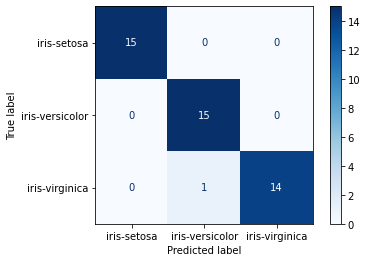

In [46]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(
    knn,
    X_test,
    Y_test,
    cmap = plt.cm.Blues
)
# la fonction s'occupe elle même du calcul de Y_pred
# Y pour X

#### Ici, nous avons spécifié les étiquettes dans l'ordre. Chaque colonne de la matrice correspond à une classe prédite et chaque ligne correspond à une classe réelle . Ainsi, la ligne totalise le nombre total d'instances de la classe.

#### La première rangée correspond à l'iris-setosa réel ; [15, 0, 0] indique que 15 des iris-setosa sont correctement prédits et qu'aucun n'est mal étiqueté ; tandis que la dernière rangée [0, 1, 14] suggère que sur 15 iris-virginica réels, 0 a été prédit comme iris-setosa, 1 a été prédit comme iris-versicolor et les 14 restants ont été correctement identifiés comme iris-virginica. Ceci est cohérent avec notre observation lors de l'analyse exploratoire des données, c'est-à-dire qu'il y avait un certain chevauchement entre les deux espèces sur le nuage de points et qu'il est plus difficile de distinguer l'iris-versicolor de l'iris-virginica que d'identifier l'iris-setosa.

#### NB: A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

### K-fold Cross Validation

#### Previously we made train-test split before fitting the model so that we can report the model performance on the test data. This is a simple kind of cross validation technique, also known as the holdout method. However, the split is random, as a result, model performance can be sensitive to how the data is split. To overcome this, we introduce k-fold cross validation.

#### In k fold cross validation, the data is divided into k subsets. Then the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set and the other k-1 subsets are combined to train the model. Then the accuracy is averaged over k trials to provide total effectiveness of the model. In this way, all data points are used; and there are more metrics so we don’t rely on one test data for model performance evaluation.

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
# Create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 5)

# train model with 5-folder cv
cv_score1 = cross_val_score(knn_cv, X, Y, cv = 10)
cv_score2 = cross_val_score(knn_cv, X, Y, cv = 5)

# print each cv score accuracy
print(cv_score1)
print(cv_score2)

[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [49]:
print(cv_score1.mean())
print(cv_score2.mean())

0.9666666666666666
0.9666666666666668


#### As a general rule, 5-fold or 10-fold cross validation is preferred; but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.

### Grid Search

In [50]:
iris

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,iris-virginica
146,6.3,2.5,5.0,1.9,iris-virginica
147,6.5,3.0,5.2,2.0,iris-virginica
148,6.2,3.4,5.4,2.3,iris-virginica


In [51]:
150 * 0.25

37.5

In [52]:
(iris['sepal_len'].iloc[35] + iris['sepal_len'].iloc[36]) / 2

5.25

In [60]:
from sklearn.model_selection import GridSearchCV

In [64]:
Knn2 = KNeighborsClassifier()

In [62]:
param_grid = {'n_neighbors': np.arange(2, 10)}

In [65]:
knn_gscv = GridSearchCV(Knn2, param_grid, cv=5)

In [66]:
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [67]:
knn_gscv.best_params_

{'n_neighbors': 4}

In [68]:
knn_gscv.best_score_

0.9666666666666668

In [69]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])

In [70]:
knn_final.fit(X, Y)

KNeighborsClassifier(n_neighbors=4)

In [71]:
knn_final.score(X, Y)

0.9733333333333334

### Label Prediction with New Data

In [72]:
new_data = np.array([3.76, 1.20])

In [73]:
new_data = new_data.reshape(1, -1)

In [74]:
knn_final.predict(new_data)

/home/gilles/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['iris-versicolor'], dtype=object)

In [75]:
knn_final.predict_proba(new_data)

/home/gilles/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0., 1., 0.]])

# Exercice continue

In [53]:
from sklearn.datasets import load_wine
wine=load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [54]:
import pandas as pd
import numpy as np
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='total_phenols', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='total_phenols'>,
        <AxesSubplot:xlabel='total_phenols', ylabel='total_phenols'>]],
      dtype=object)

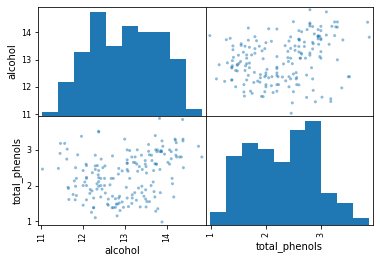

In [55]:
from pandas.plotting import scatter_matrix
scatter_matrix(data.iloc[:,[0,5]])

In [56]:
np.c_??

In [57]:
dt = pd.DataFrame(data=wine.data, columns=wine.feature_names)
dt['target'] = wine['target']
dt

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [58]:
X = wine[['alcohol', 'total_phenols']]

TypeError: unhashable type: 'list'

In [ ]:
data[['alcohol', 'total_phenols']].describe()